In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df= pd.read_csv("Mall_Customers.csv")

In [25]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Hierarchical_Cluster,DBSCAN_Cluster,MeanShift_Cluster
0,1,19,15,39,4,1,-1,4
1,2,21,15,81,0,3,0,3
2,3,20,16,6,4,1,1,4
3,4,23,16,77,0,3,0,3
4,5,31,17,40,4,1,-1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.shape

(200, 5)

In [7]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
#df_numerical = df.drop(columns = ["Genre"])

Text(0, 0.5, 'Annual Income (k$)')

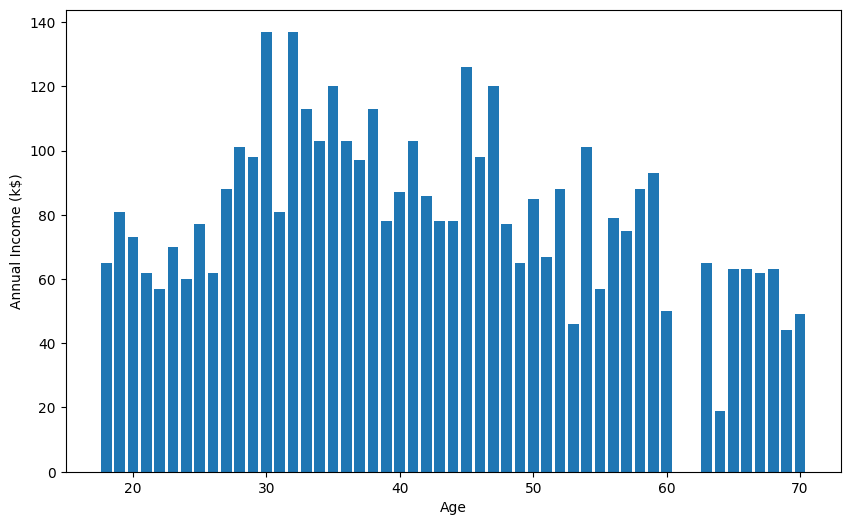

In [11]:
plt.figure(figsize=(10,6))
plt.bar(df["Age"], df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

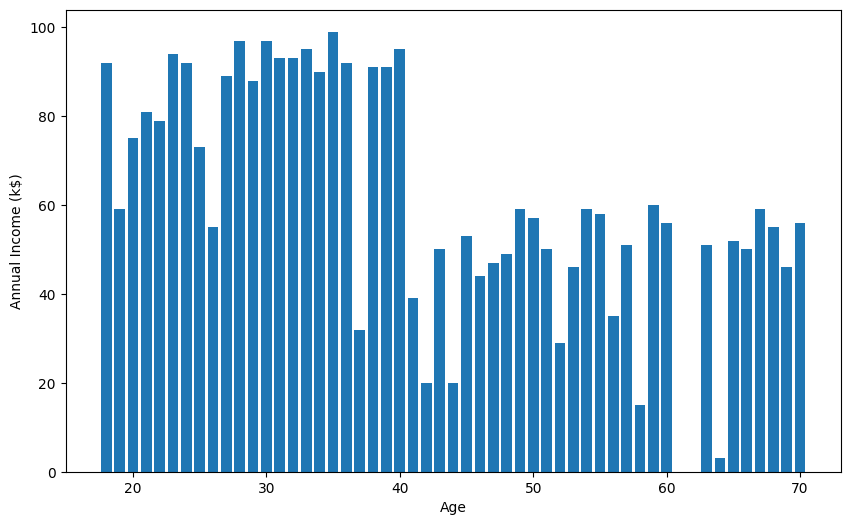

In [12]:
plt.figure(figsize=(10,6))
plt.bar(df["Age"], df["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

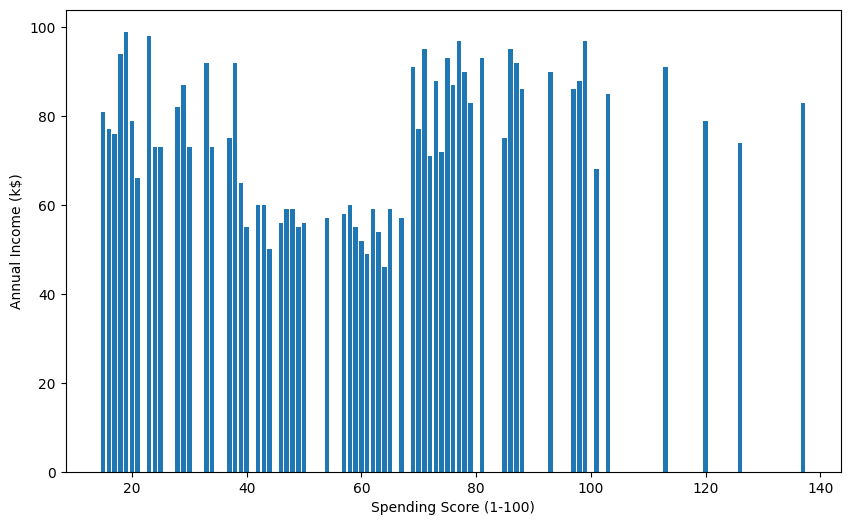

In [13]:
plt.figure(figsize=(10,6))
plt.bar(df["Annual Income (k$)"], df["Spending Score (1-100)"],)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

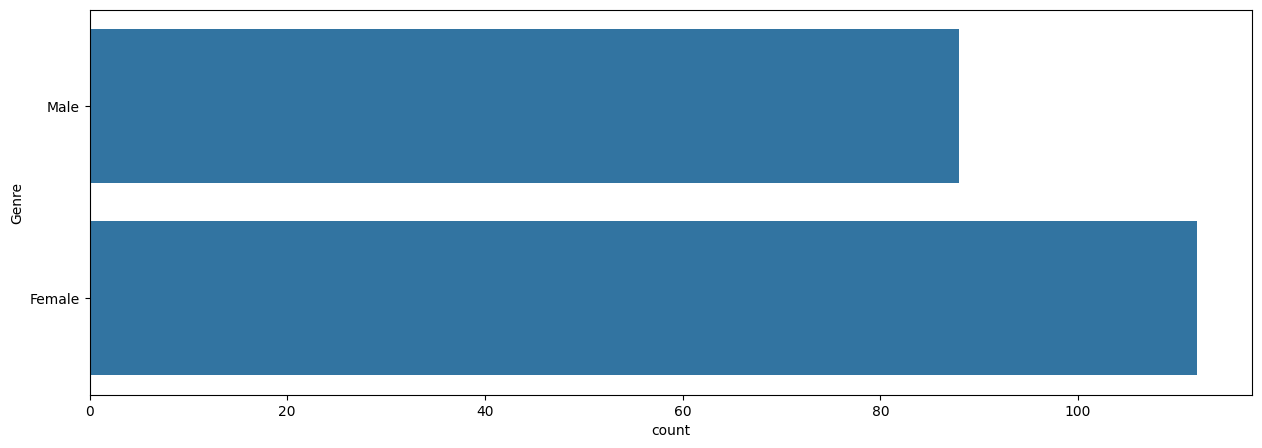

In [14]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Genre' , data = df)
plt.show()

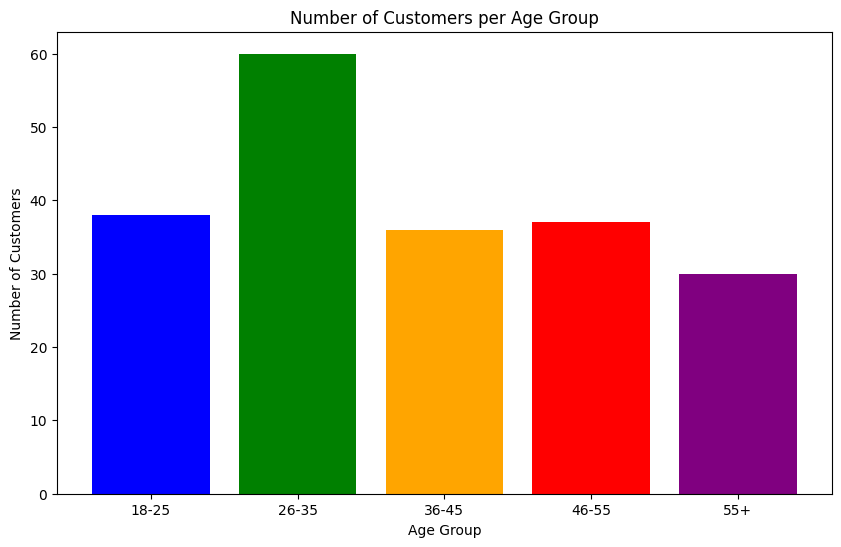

In [15]:
# Age groups
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_55above)]

plt.figure(figsize=(10, 6))
plt.bar(x_age, y_age, color=['blue', 'green', 'orange', 'red', 'purple'])

plt.title('Number of Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

plt.show()

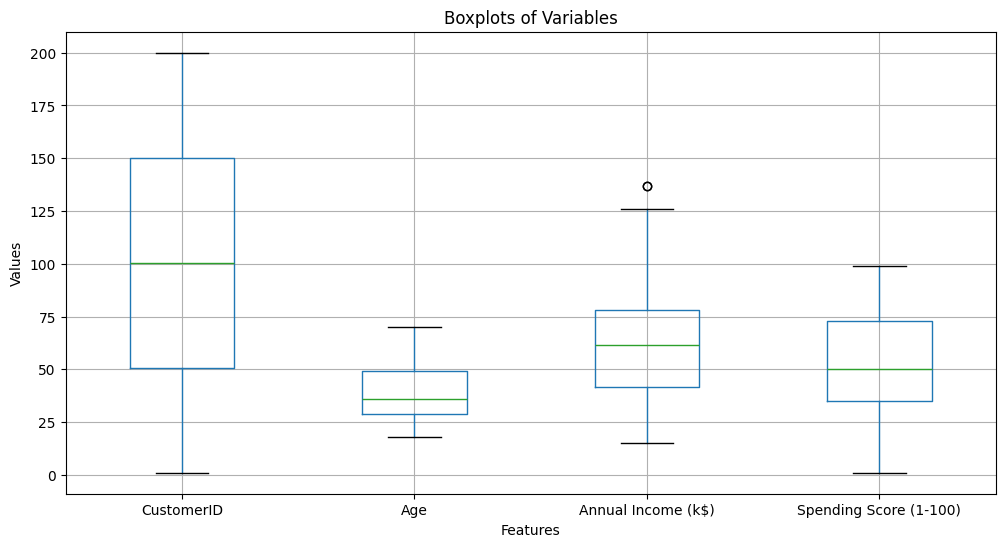

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
df.boxplot(ax=ax)

ax.set_title('Boxplots of Variables')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
plt.show()

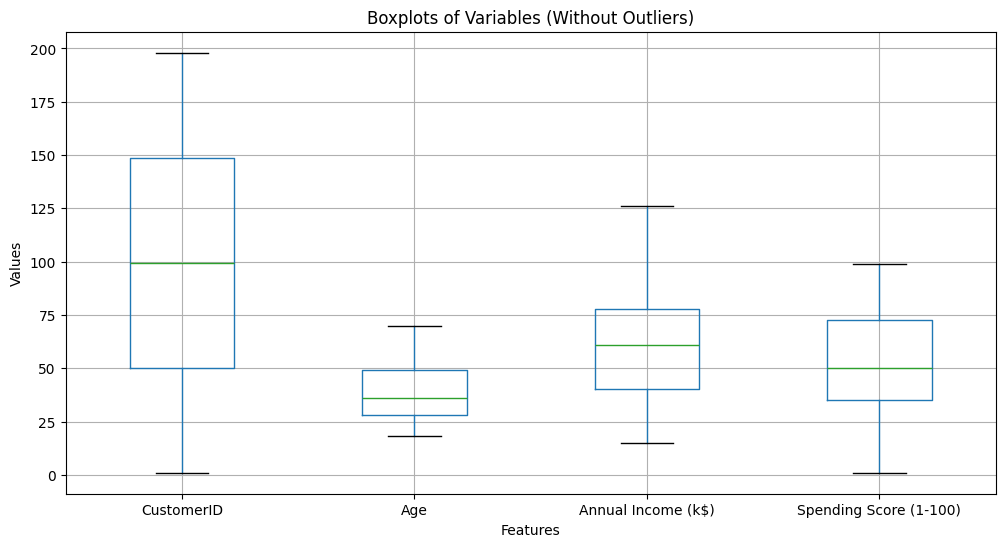

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = numeric_df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

fig, ax = plt.subplots(figsize=(12, 6))
df.boxplot(ax=ax)

ax.set_title('Boxplots of Variables (Without Outliers)')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
plt.show()


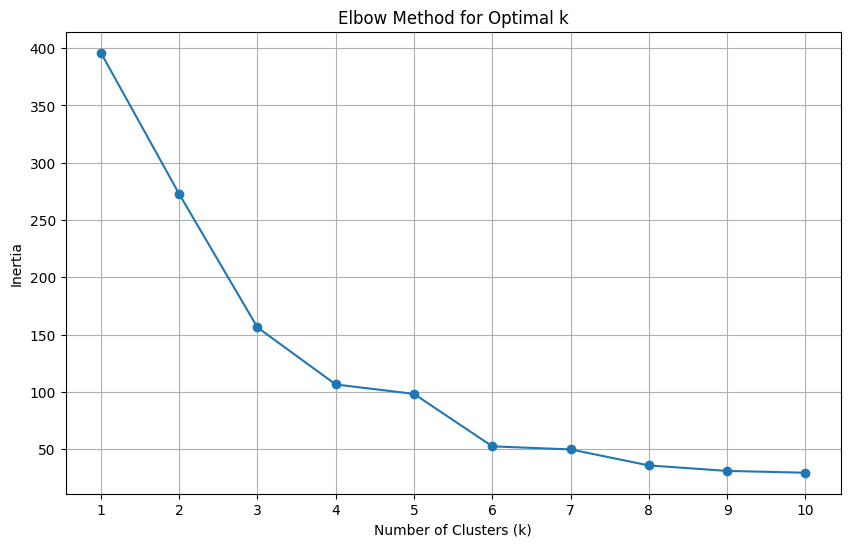

In [18]:
#Elbow Method
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_6320\2961498737.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


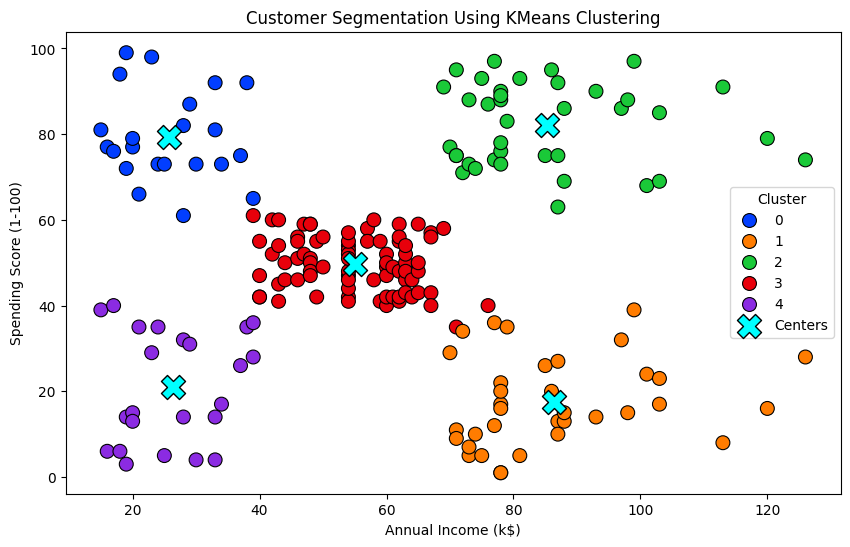

Cluster centers (in original scale):
 [[25.72727273 79.36363636]
 [86.34285714 17.57142857]
 [85.21052632 82.10526316]
 [55.0875     49.7125    ]
 [26.30434783 20.91304348]]


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df is already loaded and has columns 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features for KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=20, max_iter=300)

# Fit the model and predict clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)

centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',  
    palette='bright',
    s=100,
    edgecolor='black'
)

plt.scatter(
    centers[:, 0], centers[:, 1], 
    s=300, c='cyan', marker='X', 
    edgecolor='black', label='Centers'
)

plt.title('Customer Segmentation Using KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

print("Cluster centers (in original scale):\n", centers)


C:\Users\sumit\AppData\Local\Temp\ipykernel_6320\3134576578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hierarchical_Cluster'] = agg_clustering.fit_predict(X_scaled)


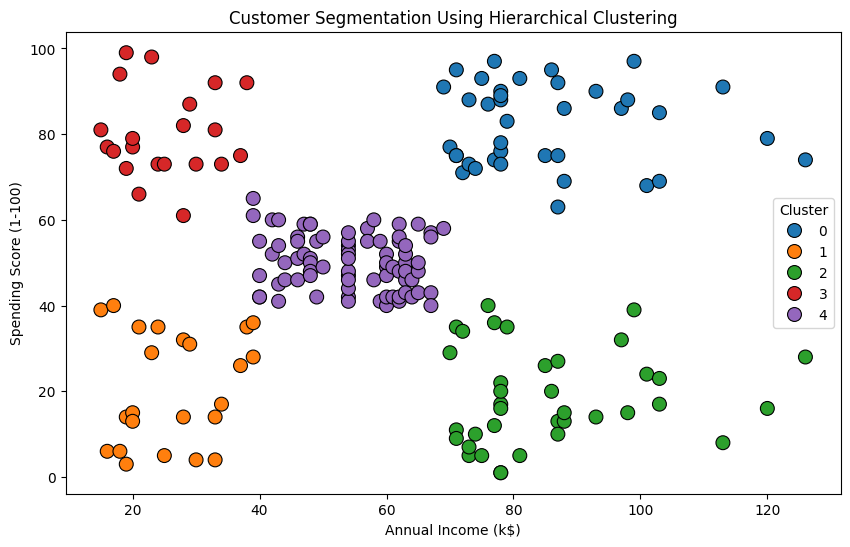

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')

# Fit the model and predict clusters
df['Hierarchical_Cluster'] = agg_clustering.fit_predict(X_scaled)

# Visualize Hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Hierarchical_Cluster',
    palette='tab10',
    s=100,
    edgecolor='black'
)

# Add title and labels
plt.title('Customer Segmentation Using Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Show the plot
plt.show()


C:\Users\sumit\AppData\Local\Temp\ipykernel_6320\3270388482.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


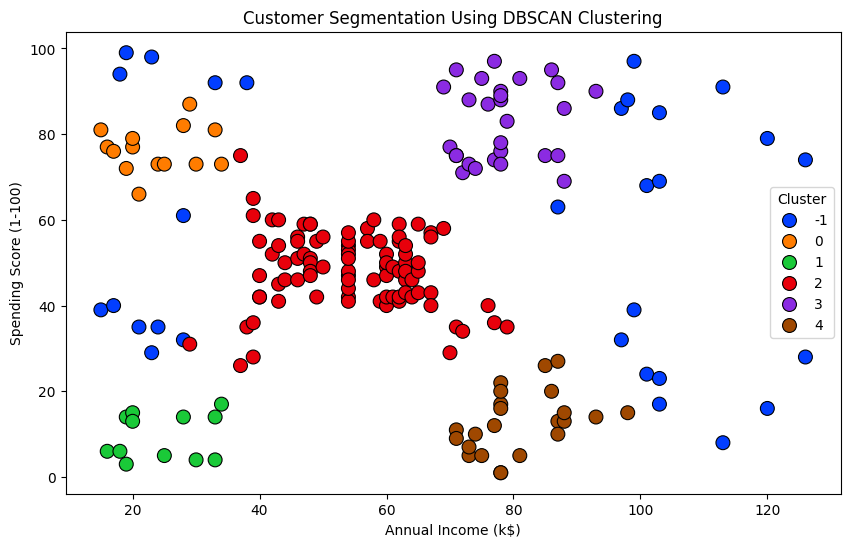

In [21]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=8)  # You might need to tune eps based on your data 0.4,8 0.45,10

# Fit the model and predict clusters
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',  # Color based on DBSCAN clusters
    palette='bright',
    s=100,
    edgecolor='black'
)

# Add title and labels
plt.title('Customer Segmentation Using DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Show the plot
plt.show()


C:\Users\sumit\AppData\Local\Temp\ipykernel_6320\3769315445.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeanShift_Cluster'] = mean_shift.fit_predict(X_scaled)


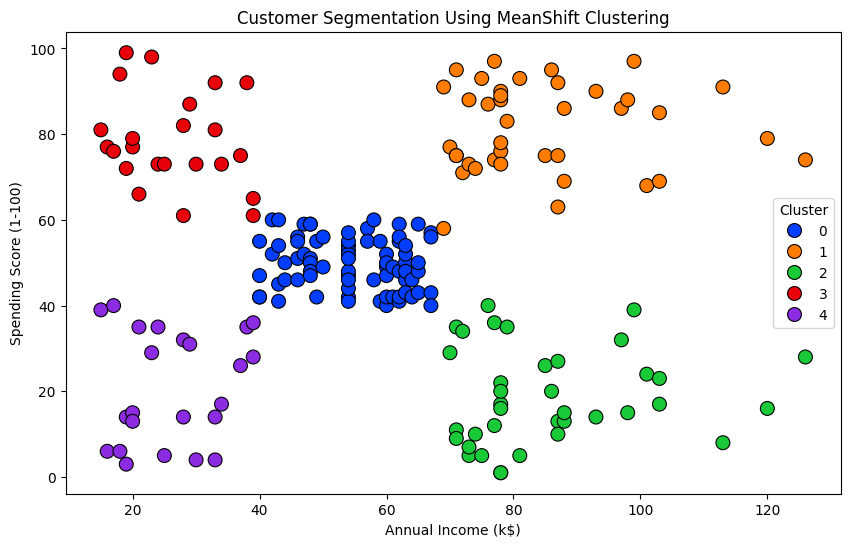

In [22]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the MeanShift model
mean_shift = MeanShift(bandwidth=0.9)  # You might need to tune bandwidth based on your data

# Fit the model and predict clusters
df['MeanShift_Cluster'] = mean_shift.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='MeanShift_Cluster',  # Color based on MeanShift clusters
    palette='bright',
    s=100,
    edgecolor='black'
)

# Add title and labels
plt.title('Customer Segmentation Using MeanShift Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Show the plot
plt.show()


In [23]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, df['Cluster'])
hierarchical_silhouette = silhouette_score(X_scaled, df['Hierarchical_Cluster'])
dbscan_silhouette = silhouette_score(X_scaled, df['DBSCAN_Cluster'], metric='euclidean')
meanShift_silhouette = silhouette_score(X_scaled, df['MeanShift_Cluster'])


print(f'Mean Shift Silhouette Score: {meanShift_silhouette}')
print(f'KMeans Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')


Mean Shift Silhouette Score: 0.5506500673787407
KMeans Silhouette Score: 0.5599199830769206
Hierarchical Silhouette Score: 0.5596723824629399
DBSCAN Silhouette Score: 0.4030367384335834
